<a href="https://colab.research.google.com/github/BhanuDanda/NLP/blob/main/18-08-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame columns: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
First 25 Complaint Texts:

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
10         

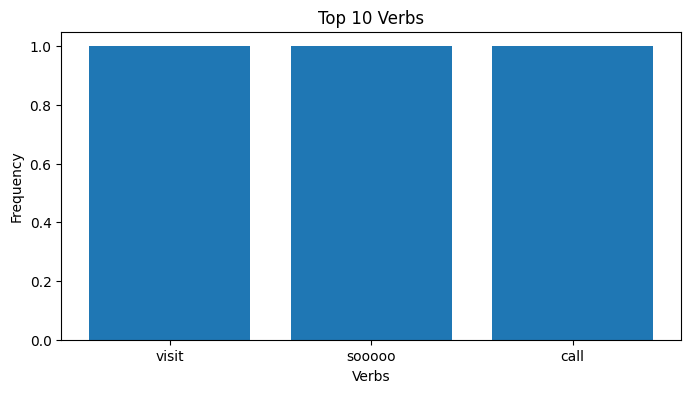

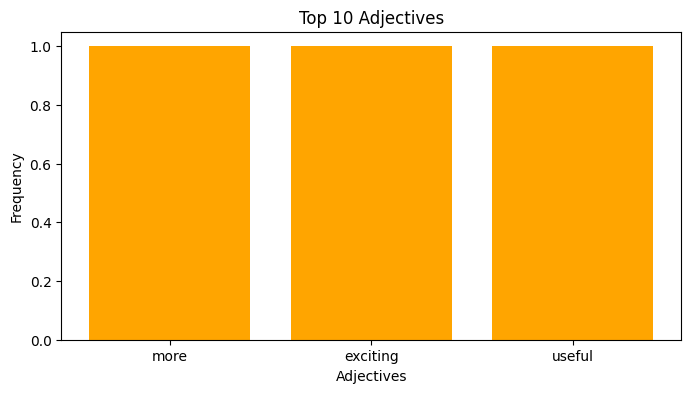

In [2]:
import pandas as pd
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt
data = pd.read_csv("/content/Consumer_Complaints.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("DataFrame columns:", data.columns)
print("First 25 Complaint Texts:\n")
print(data['Consumer complaint narrative'].head(25))
nlp = spacy.load("en_core_web_sm")
all_pos = []
for text in data['Consumer complaint narrative'][:25]:
    doc = nlp(str(text))
    all_pos.extend([token.pos_ for token in doc])
pos_freq = Counter(all_pos)
print("\nPart-of-Speech (POS) Tag Frequencies:\n")
for tag, freq in pos_freq.items():
    print(tag, ":", freq)

nlp = spacy.load("en_core_web_sm")
texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]
cleaned_texts = []
for text in texts:
    text = re.sub(r'\+?\d[\d\-\s]{8,}\d', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    cleaned_texts.append(text)
combined_text = " ".join(cleaned_texts)
print("Cleaned Text:\n", combined_text, "\n")
doc = nlp(combined_text)
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]
verb_counts = Counter(verbs)
adj_counts = Counter(adjectives)
top_verbs = verb_counts.most_common(10)
top_adjs = adj_counts.most_common(10)
print("Top Verbs:", top_verbs)
print("Top Adjectives:", top_adjs)
if top_verbs:
    verbs_x, verbs_y = zip(*top_verbs)
    plt.figure(figsize=(8,4))
    plt.bar(verbs_x, verbs_y)
    plt.title("Top 10 Verbs")
    plt.xlabel("Verbs")
    plt.ylabel("Frequency")
    plt.show()
if top_adjs:
    adjs_x, adjs_y = zip(*top_adjs)
    plt.figure(figsize=(8,4))
    plt.bar(adjs_x, adjs_y, color='orange')
    plt.title("Top 10 Adjectives")
    plt.xlabel("Adjectives")
    plt.ylabel("Frequency")
    plt.show()